In [1]:
%load_ext nb_black
%load_ext lab_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<IPython.core.display.Javascript object>

In [3]:
dataset = pd.read_csv(
    "TSLA.csv",
    na_values=["null"],
    index_col="Date",
    parse_dates=True,
    infer_datetime_format=True,
)

<IPython.core.display.Javascript object>

In [4]:
Y = pd.DataFrame(dataset["Adj Close"])
features = ["Open", "High", "Low", "Volume"]

<IPython.core.display.Javascript object>

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(dataset[features])
X = pd.DataFrame(columns=features, data=feature_transform, index=dataset.index)
X.head()

,Open,High,Low,Volume
Date,,,,
2010-06-29,0.000465,0.001350,0.000422,0.306605
2010-06-30,0.001568,0.002224,0.001371,0.280640
2010-07-01,0.001439,0.001498,0.000871,0.133184
2010-07-02,0.001114,0.001043,0.000614,0.082560
2010-07-06,0.000627,0.000543,0.000140,0.110956


<IPython.core.display.Javascript object>

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

<IPython.core.display.Javascript object>

In [7]:
X_train = X_train.sort_values(by="Date")
Y_train = Y_train.sort_values(by="Date")
X_test = X_test.sort_values(by="Date")
Y_test = Y_test.sort_values(by="Date")

<IPython.core.display.Javascript object>

In [11]:
trainX = np.array(X_train)
testX = np.array(X_test)

<IPython.core.display.Javascript object>

In [12]:
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

<IPython.core.display.Javascript object>

In [13]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

lstm = Sequential()
lstm.add(
    LSTM(
        32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False
    )
)
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


<IPython.core.display.Javascript object>

In [20]:
history = lstm.fit(
    X_train,
    Y_train,
    epochs=200,
    validation_data=(X_test, Y_test),
    batch_size=8,
    verbose=1,
)

Epoch 1/200
329/329 [==============================] - 2s 3ms/step - loss: 20.7901 - val_loss: 22.0966
Epoch 2/200
329/329 [==============================] - 1s 2ms/step - loss: 19.9474 - val_loss: 21.5887
Epoch 3/200
329/329 [==============================] - 1s 2ms/step - loss: 19.2870 - val_loss: 21.9367
Epoch 4/200
329/329 [==============================] - 1s 2ms/step - loss: 18.9677 - val_loss: 20.3099
Epoch 5/200
329/329 [==============================] - 1s 2ms/step - loss: 18.6366 - val_loss: 20.8894
Epoch 6/200
329/329 [==============================] - 1s 2ms/step - loss: 18.5666 - val_loss: 18.4465
Epoch 7/200
329/329 [==============================] - 1s 2ms/step - loss: 18.2734 - val_loss: 17.9656
Epoch 8/200
329/329 [==============================] - 1s 2ms/step - loss: 18.3159 - val_loss: 19.0922
Epoch 9/200
329/329 [==============================] - 1s 2ms/step - loss: 18.3035 - val_loss: 22.6684
Epoch 10/200
329/329 [==============================] - 1s 2ms/step - los

<IPython.core.display.Javascript object>

In [21]:
Y_pred = lstm.predict(X_test)

<IPython.core.display.Javascript object>

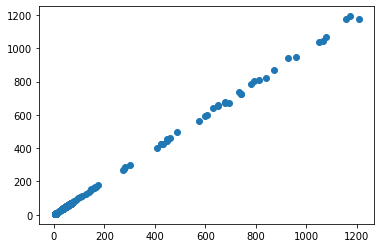

<IPython.core.display.Javascript object>

In [22]:
plt.scatter(Y_test, Y_pred)

In [23]:
Y_pred = pd.DataFrame(Y_pred, columns=["Pred"], index=Y_test.index)

<IPython.core.display.Javascript object>

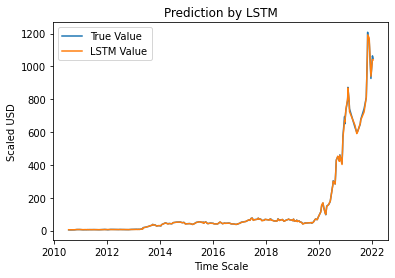

<IPython.core.display.Javascript object>

In [24]:
plt.plot(Y_test, label="True Value")
plt.plot(Y_pred, label="LSTM Value")
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled USD")
plt.legend()
plt.show()

In [19]:
Y_test

,Adj Close
Date,
2010-07-22,4.200000
2010-07-30,3.988000
2010-08-13,3.664000
2010-09-13,4.144000
2010-09-22,3.974000
...,...
2021-11-22,1156.869995
2021-12-14,958.510010
2021-12-16,926.919983


<IPython.core.display.Javascript object>